In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [3]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [4]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,19220.000000,19220.000000,19219.000000,19219.000000,19219.000000
mean,25.088643,5.289362,287.734586,10.237994,103.066341
std,23.448518,80.081866,3297.651489,155.703574,1795.041235
min,-41.454500,-157.498300,0.000000,0.000000,0.000000
25%,12.518600,-70.162700,0.000000,0.000000,0.000000
50%,31.221000,9.775000,0.000000,0.000000,0.000000
75%,42.165700,57.500000,8.000000,0.000000,0.000000
max,72.000000,178.065000,67800.000000,5476.000000,59879.000000


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.columns = ['Province', 'Country', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered']

In [7]:
data['active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

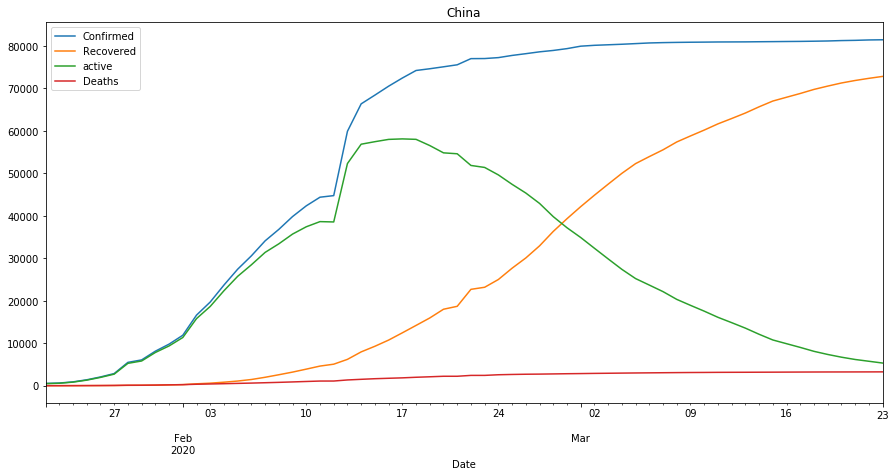

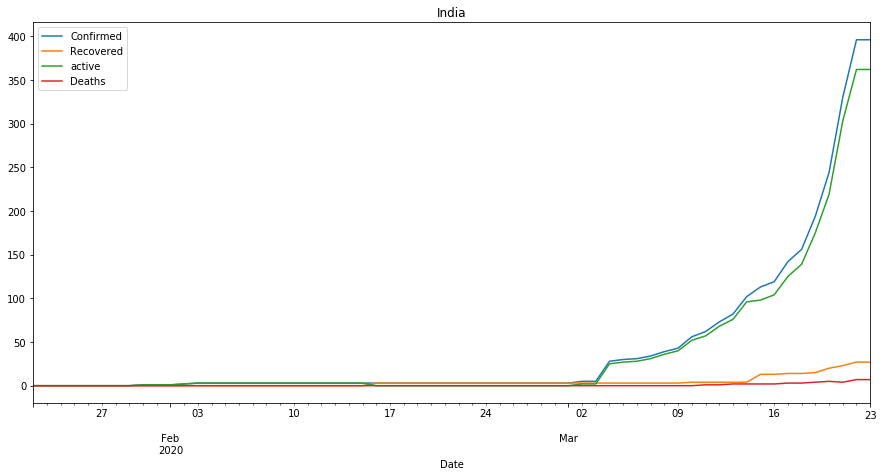

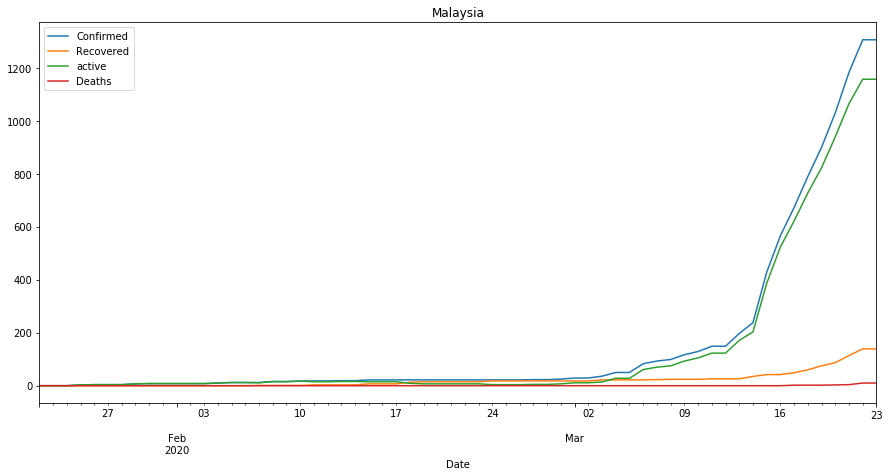

In [8]:
def plot_by_country(country_name):

    india_data = data[data['Country']==country_name]
    fig,ax = plt.subplots(figsize=(15,7))
    india_data.groupby('Date')['Confirmed'].sum().plot(ax=ax)
    india_data.groupby('Date')['Recovered'].sum().plot(ax=ax)
    india_data.groupby('Date')['active'].sum().plot(ax=ax)
    india_data.groupby('Date')['Deaths'].sum().plot(ax=ax)
    plt.legend()
    plt.title(country_name);
plot_by_country('China')    
plot_by_country('India')
plot_by_country('Malaysia')

In [9]:
world_wide= data[data['Date']==max(data['Date'])].groupby('Country')['Confirmed', 'Deaths','active','Recovered'].sum().reset_index()

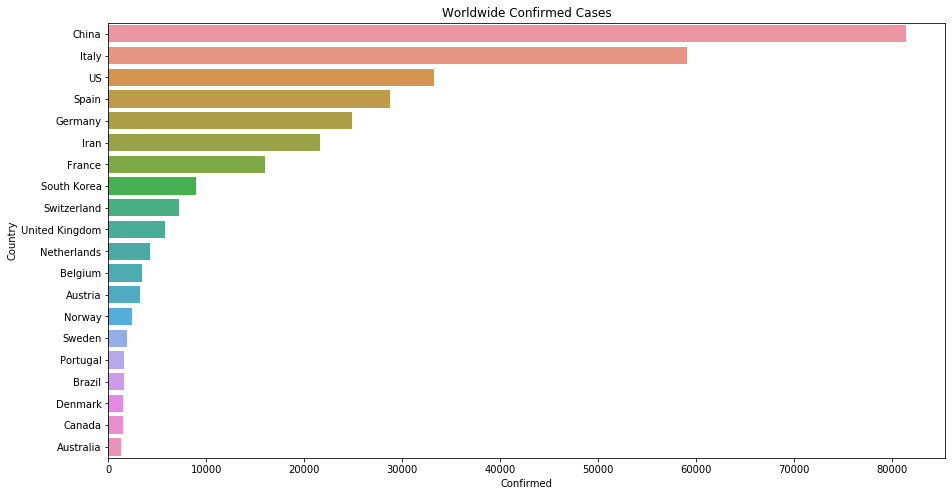

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x='Confirmed',y='Country',data=world_wide.sort_values(by='Confirmed',ascending=False)[:20])
plt.title('Worldwide Confirmed Cases');

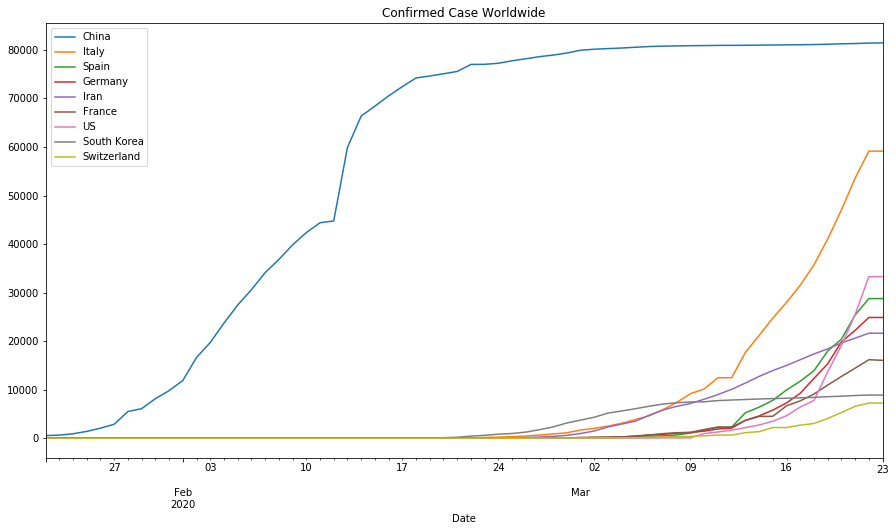

In [11]:
# Number of confirmed cases in the top 10 countries according to Confirmed Cases
plt.figure(figsize=(15,8))
data[data['Country']=='China'].groupby('Date')['Confirmed'].sum().plot(label='China')
data[data['Country']=='Italy'].groupby('Date')['Confirmed'].sum().plot(label='Italy')
data[data['Country']=='Spain'].groupby('Date')['Confirmed'].sum().plot(label='Spain')
data[data['Country']=='Germany'].groupby('Date')['Confirmed'].sum().plot(label='Germany')
data[data['Country']=='Iran'].groupby('Date')['Confirmed'].sum().plot(label='Iran')
data[data['Country']=='France'].groupby('Date')['Confirmed'].sum().plot(label='France')
data[data['Country']=='US'].groupby('Date')['Confirmed'].sum().plot(label='US')
data[data['Country']=='South Korea'].groupby('Date')['Confirmed'].sum().plot(label='South Korea')
data[data['Country']=='Switzerland'].groupby('Date')['Confirmed'].sum().plot(label='Switzerland')
plt.legend()
plt.title('Confirmed Case Worldwide');

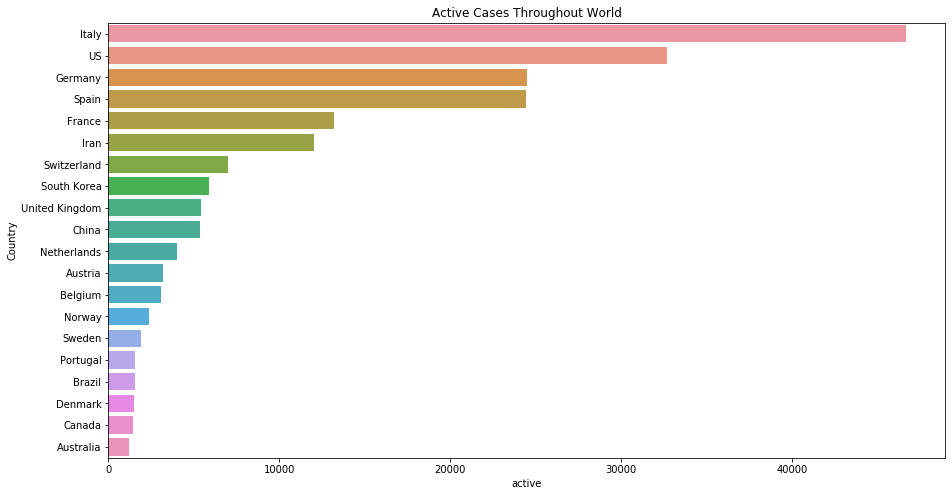

In [12]:
# Number of active cases in the dataset
plt.figure(figsize=(15,8))
sns.barplot(x='active',y='Country',data=world_wide.sort_values(by='active',ascending=False)[:20])
plt.title('Active Cases Throughout World');

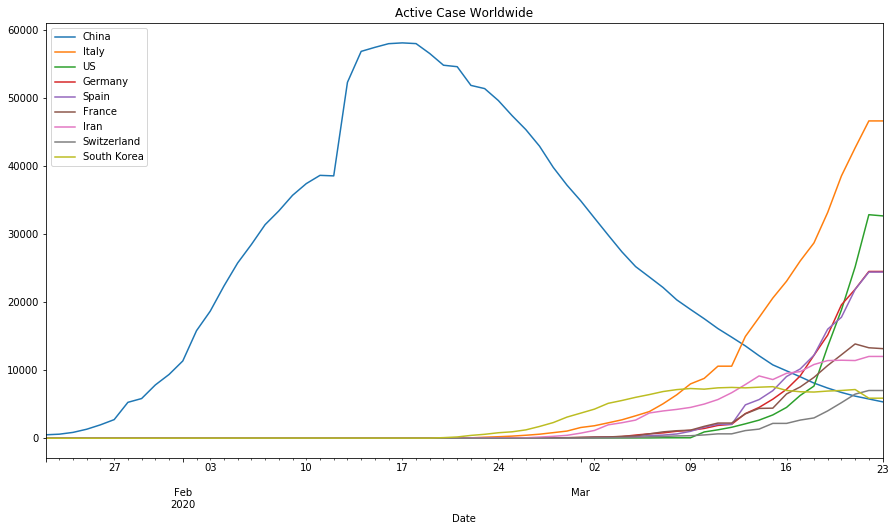

In [13]:
# Acive cases world wide
plt.figure(figsize=(15,8))
data[data['Country']=='China'].groupby('Date')['active'].sum().plot(label='China')
data[data['Country']=='Italy'].groupby('Date')['active'].sum().plot(label='Italy')
data[data['Country']=='US'].groupby('Date')['active'].sum().plot(label='US')
data[data['Country']=='Germany'].groupby('Date')['active'].sum().plot(label='Germany')
data[data['Country']=='Spain'].groupby('Date')['active'].sum().plot(label='Spain')
data[data['Country']=='France'].groupby('Date')['active'].sum().plot(label='France')
data[data['Country']=='Iran'].groupby('Date')['active'].sum().plot(label='Iran')
data[data['Country']=='Switzerland'].groupby('Date')['active'].sum().plot(label='Switzerland')
data[data['Country']=='South Korea'].groupby('Date')['active'].sum().plot(label='South Korea')

plt.legend()
plt.title('Active Case Worldwide');

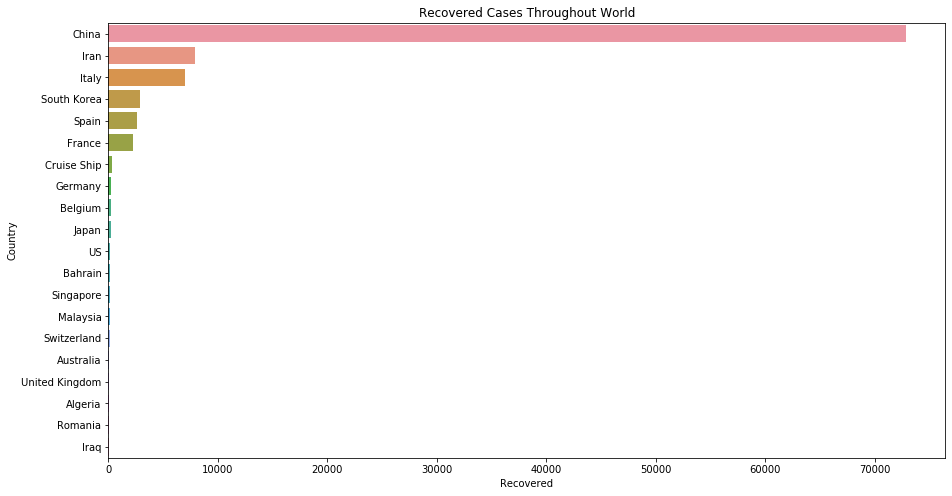

In [14]:
# Number of Recovered cases in the dataset
plt.figure(figsize=(15,8))
sns.barplot(x='Recovered',y='Country',data=world_wide.sort_values(by='Recovered',ascending=False)[:20])
plt.title('Recovered Cases Throughout World');

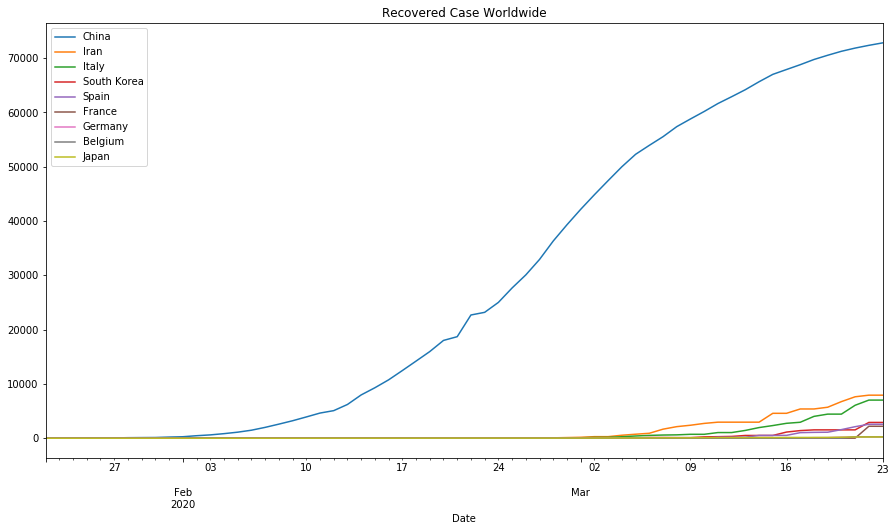

In [15]:
# Recovered Cases worldwide
plt.figure(figsize=(15,8))
data[data['Country']=='China'].groupby('Date')['Recovered'].sum().plot(label='China')
data[data['Country']=='Iran'].groupby('Date')['Recovered'].sum().plot(label='Iran')
data[data['Country']=='Italy'].groupby('Date')['Recovered'].sum().plot(label='Italy')
data[data['Country']=='South Korea'].groupby('Date')['Recovered'].sum().plot(label='South Korea')
data[data['Country']=='Spain'].groupby('Date')['Recovered'].sum().plot(label='Spain')
data[data['Country']=='France'].groupby('Date')['Recovered'].sum().plot(label='France')
data[data['Country']=='Germany'].groupby('Date')['Recovered'].sum().plot(label='Germany')
data[data['Country']=='Belgium'].groupby('Date')['Recovered'].sum().plot(label='Belgium')
data[data['Country']=='Japan'].groupby('Date')['Recovered'].sum().plot(label='Japan')
plt.legend()
plt.title('Recovered Case Worldwide');

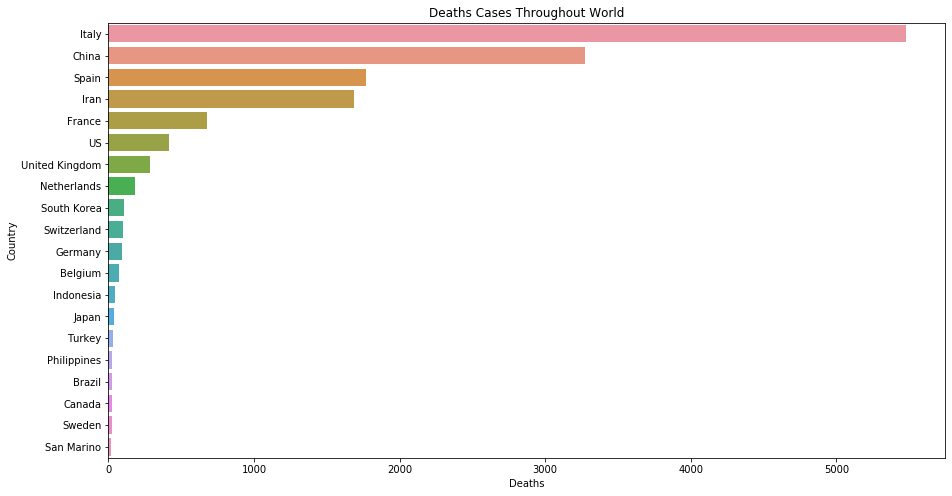

In [16]:
# Number of Deaths cases in the dataset
plt.figure(figsize=(15,8))
sns.barplot(x='Deaths',y='Country',data=world_wide.sort_values(by='Deaths',ascending=False)[:20])
plt.title('Deaths Cases Throughout World');

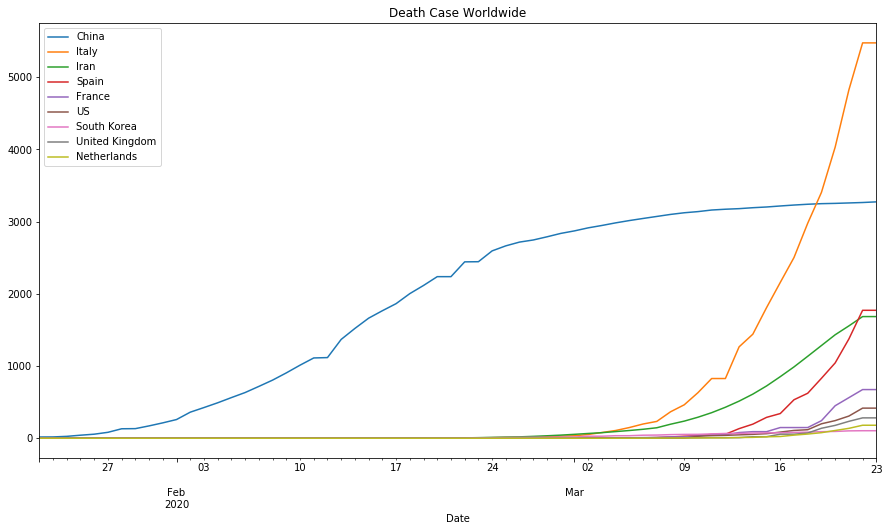

In [17]:
# Death cases throughout world
plt.figure(figsize=(15,8))
data[data['Country']=='China'].groupby('Date')['Deaths'].sum().plot(label='China')
data[data['Country']=='Italy'].groupby('Date')['Deaths'].sum().plot(label='Italy')
data[data['Country']=='Iran'].groupby('Date')['Deaths'].sum().plot(label='Iran')
data[data['Country']=='Spain'].groupby('Date')['Deaths'].sum().plot(label='Spain')
data[data['Country']=='France'].groupby('Date')['Deaths'].sum().plot(label='France')
data[data['Country']=='US'].groupby('Date')['Deaths'].sum().plot(label='US')
data[data['Country']=='South Korea'].groupby('Date')['Deaths'].sum().plot(label='South Korea')
data[data['Country']=='United Kingdom'].groupby('Date')['Deaths'].sum().plot(label='United Kingdom')
data[data['Country']=='Netherlands'].groupby('Date')['Deaths'].sum().plot(label='Netherlands')
plt.legend()
plt.title('Death Case Worldwide');

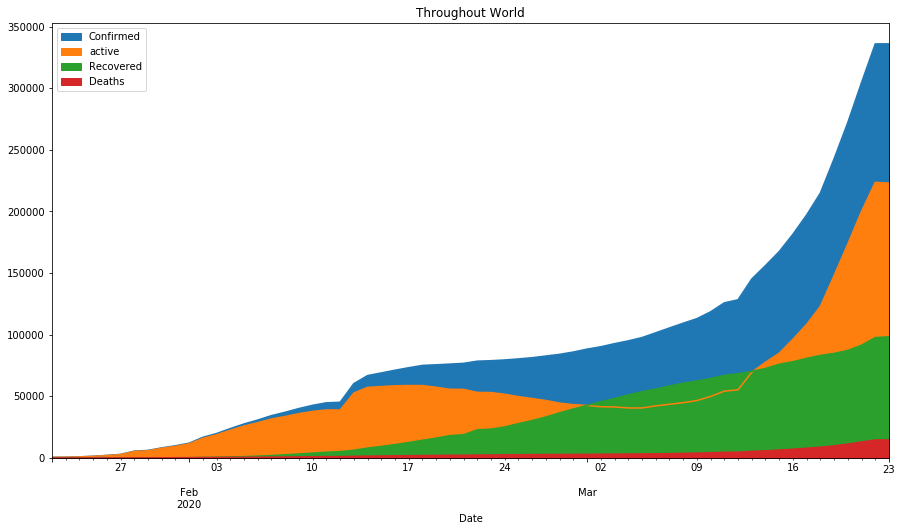

In [18]:
# Active, Recovered, Deaths and Confirmed cases in time lapse
plt.figure(figsize=(15,8))
data.groupby('Date')['Confirmed'].sum().plot.area()
data.groupby('Date')['active'].sum().plot.area()
data.groupby('Date')['Recovered'].sum().plot.area()
data.groupby('Date')['Deaths'].sum().plot.area()
plt.title('Throughout World')
plt.legend();

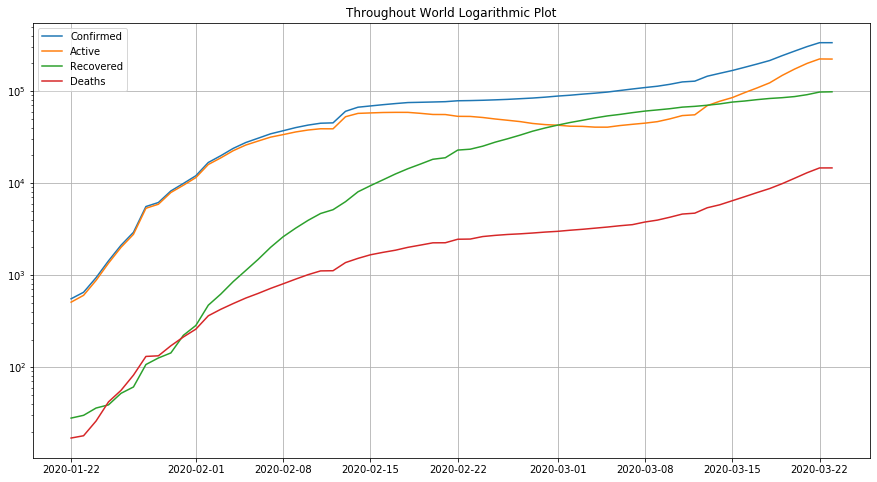

In [19]:
# Active, Recovered, Deaths and Confirmed cases in time lapse
plt.figure(figsize=(15,8))
plt.semilogy(data.groupby('Date')['Confirmed'].sum(),label='Confirmed')
plt.semilogy(data.groupby('Date')['active'].sum(),label='Active')
plt.semilogy(data.groupby('Date')['Recovered'].sum(),label='Recovered')
plt.semilogy(data.groupby('Date')['Deaths'].sum(),label='Deaths')
plt.title('Throughout World Logarithmic Plot')
plt.grid()
plt.legend();

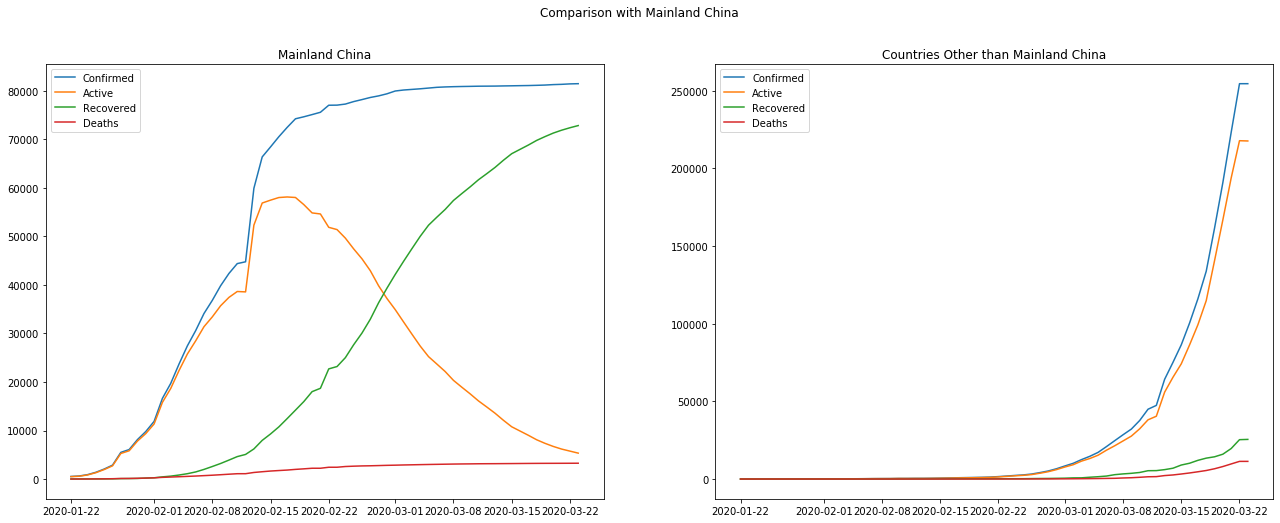

In [20]:
# China Vs Rest of World
fig, ax = plt.subplots(1,2,figsize=(22,8))
china_data = data[data['Country']=='China'].groupby('Date')['Confirmed', 'Deaths','active','Recovered'].sum().reset_index()
rest_world = data[data['Country']!='China'].groupby('Date')['Confirmed', 'Deaths','active','Recovered'].sum().reset_index()

ax[0].plot(china_data['Date'],china_data['Confirmed'],label='Confirmed')
ax[0].plot(china_data['Date'],china_data['active'],label='Active')
ax[0].plot(china_data['Date'],china_data['Recovered'],label='Recovered')
ax[0].plot(china_data['Date'],china_data['Deaths'],label='Deaths')
ax[0].set_title('Mainland China')
ax[0].legend()

ax[1].plot(rest_world['Date'],rest_world['Confirmed'],label='Confirmed')
ax[1].plot(rest_world['Date'],rest_world['active'],label='Active')
ax[1].plot(rest_world['Date'],rest_world['Recovered'],label='Recovered')
ax[1].plot(rest_world['Date'],rest_world['Deaths'],label='Deaths')
ax[1].set_title('Countries Other than Mainland China')
ax[1].legend()

fig.suptitle('Comparison with Mainland China');

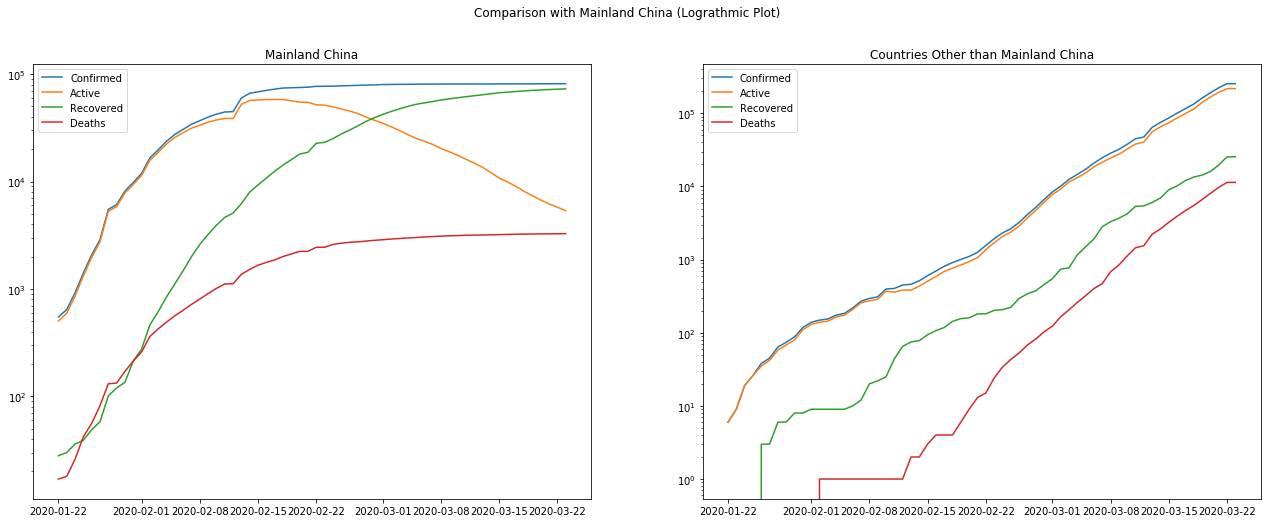

In [21]:
# China Vs Rest of World
fig, ax = plt.subplots(1,2,figsize=(22,8))
ax[0].semilogy(china_data['Date'],china_data['Confirmed'],label='Confirmed')
ax[0].semilogy(china_data['Date'],china_data['active'],label='Active')
ax[0].semilogy(china_data['Date'],china_data['Recovered'],label='Recovered')
ax[0].semilogy(china_data['Date'],china_data['Deaths'],label='Deaths')
ax[0].set_title('Mainland China')
ax[0].legend()

ax[1].semilogy(rest_world['Date'],rest_world['Confirmed'],label='Confirmed')
ax[1].semilogy(rest_world['Date'],rest_world['active'],label='Active')
ax[1].semilogy(rest_world['Date'],rest_world['Recovered'],label='Recovered')
ax[1].semilogy(rest_world['Date'],rest_world['Deaths'],label='Deaths')
ax[1].set_title('Countries Other than Mainland China')
ax[1].legend()

fig.suptitle('Comparison with Mainland China (Lograthmic Plot)');

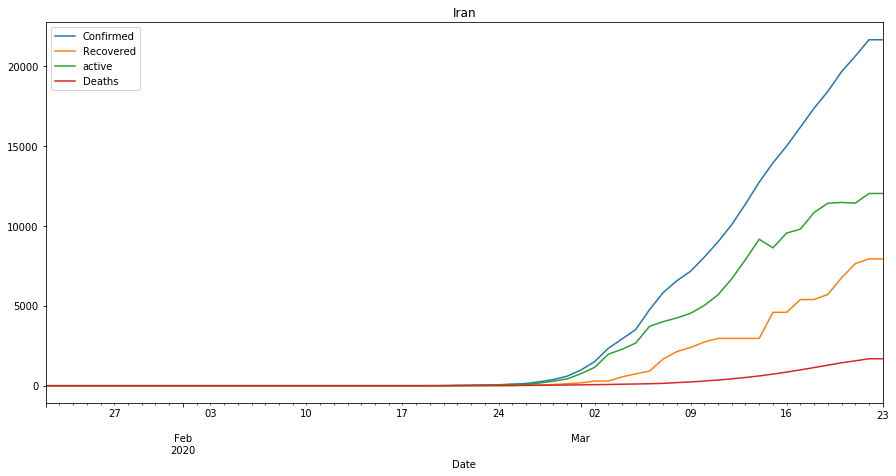

In [22]:
plot_by_country('Iran')

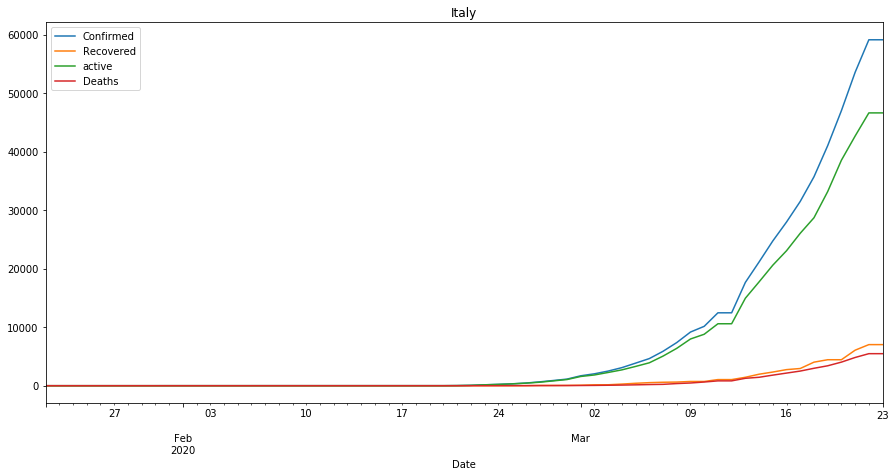

In [23]:
plot_by_country('Italy')

In [24]:
# group contries and there relative comparison with each other
asian_countries = list(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia','Cambodia', 'Sri Lanka',
                  'Philippines', 'India','Pakistan','Indonesia','Bhutan','Maldives','Bangladesh',
                  'Brunei','Mongolia','China','Korea, South','Taiwan*', 'Vietnam'])
############################################################################################################################
european_country = list(['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland',
               'Italy', 'Latvia','Luxembourg','Lithuania','Malta','Norway','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia',
               'Spain', 'Sweden', 'United Kingdom', 'Iceland', 'Russia', 'Switzerland', 'Serbia', 'Ukraine', 'Belarus',
               'Albania', 'Bosnia and Herzegovina', 'Kosovo', 'Moldova', 'Montenegro', 'North Macedonia'])
############################################################################################################################
middle_east_country = list(['United Arab Emirates','Egypt', 'Lebanon', 'Iraq', 'Oman','Afghanistan', 'Bahrain', 'Kuwait', 'Algeria',
                      'Israel','Qatar','Azerbaijan','Saudi Arabia','Jordan','Iran','Turkey','Kazakhstan'])
############################################################################################################################
african_countries = list(['Nigeria','Ecuador','Dominican Republic','South Africa','French Guiana', 'Malta','Cyprus','Congo (Kinshasa)', 
                                            "Cote d'Ivoire", 'Jamaica','Guyana','Cayman Islands', 'Guadeloupe', 'Ethiopia', 'Sudan', 'Guinea','Aruba', 'Kenya', 'Antigua and Barbuda'])
#############################################################################################################################
north_south_america = list(['Canada','Australia','Mexico', 'New Zealand','Argentina', 'Chile','Colombia', 'Costa Rica', 'Peru','US','Cuba', 'Guyana','Guatemala',
                           'Bahamas, The','Zimbabwe'])

In [25]:
#print(list(data['Country'].unique()))

In [26]:
asia = data[data['Country'].isin(asian_countries)]
europe = data[data['Country'].isin(european_country)]
middle_east = data[data['Country'].isin(middle_east_country)]
africa = data[data['Country'].isin(african_countries)]
us = data[data['Country'].isin(north_south_america)]

In [27]:
# Analysis of asian countries
asia = asia[asia['Date']==max(asia['Date'])].groupby('Country')['Confirmed','active','Recovered','Deaths'].sum().reset_index()
europe = europe[europe['Date']==max(europe['Date'])].groupby('Country')['Confirmed','active','Recovered','Deaths'].sum().reset_index()
middle_east = middle_east[middle_east['Date']==max(middle_east['Date'])].groupby('Country')['Confirmed','active','Recovered','Deaths'].sum().reset_index()
africa = africa[africa['Date']==max(africa['Date'])].groupby('Country')['Confirmed','active','Recovered','Deaths'].sum().reset_index()
us = us[us['Date']==max(us['Date'])].groupby('Country')['Confirmed','active','Recovered','Deaths'].sum().reset_index()

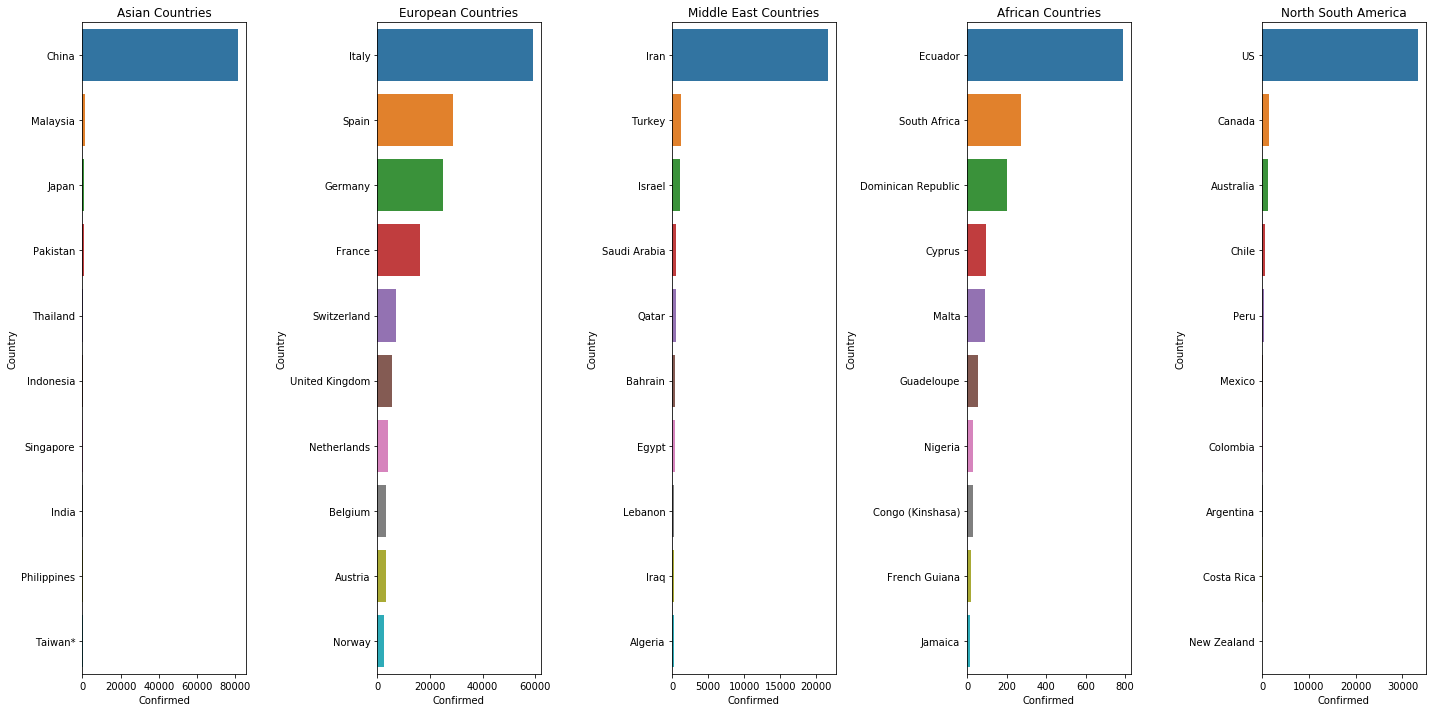

In [28]:
# plot the Confirmed cases
fig, ax = plt.subplots(1,5,figsize=(20,10))
sns.barplot(x='Confirmed',y='Country',data=asia.sort_values(by='Confirmed',ascending=False).iloc[:10],ax=ax[0])
ax[0].set_title('Asian Countries')
sns.barplot(x='Confirmed',y='Country',data=europe.sort_values(by='Confirmed',ascending=False).iloc[:10],ax=ax[1])
ax[1].set_title('European Countries')
sns.barplot(x='Confirmed',y='Country',data=middle_east.sort_values(by='Confirmed',ascending=False).iloc[:10],ax=ax[2])
ax[2].set_title('Middle East Countries')
sns.barplot(x='Confirmed',y='Country',data=africa.sort_values(by='Confirmed',ascending=False).iloc[:10],ax=ax[3])
ax[3].set_title('African Countries')
sns.barplot(x='Confirmed',y='Country',data=us.sort_values(by='Confirmed',ascending=False).iloc[:10],ax=ax[4])
ax[4].set_title('North South America')
plt.tight_layout();

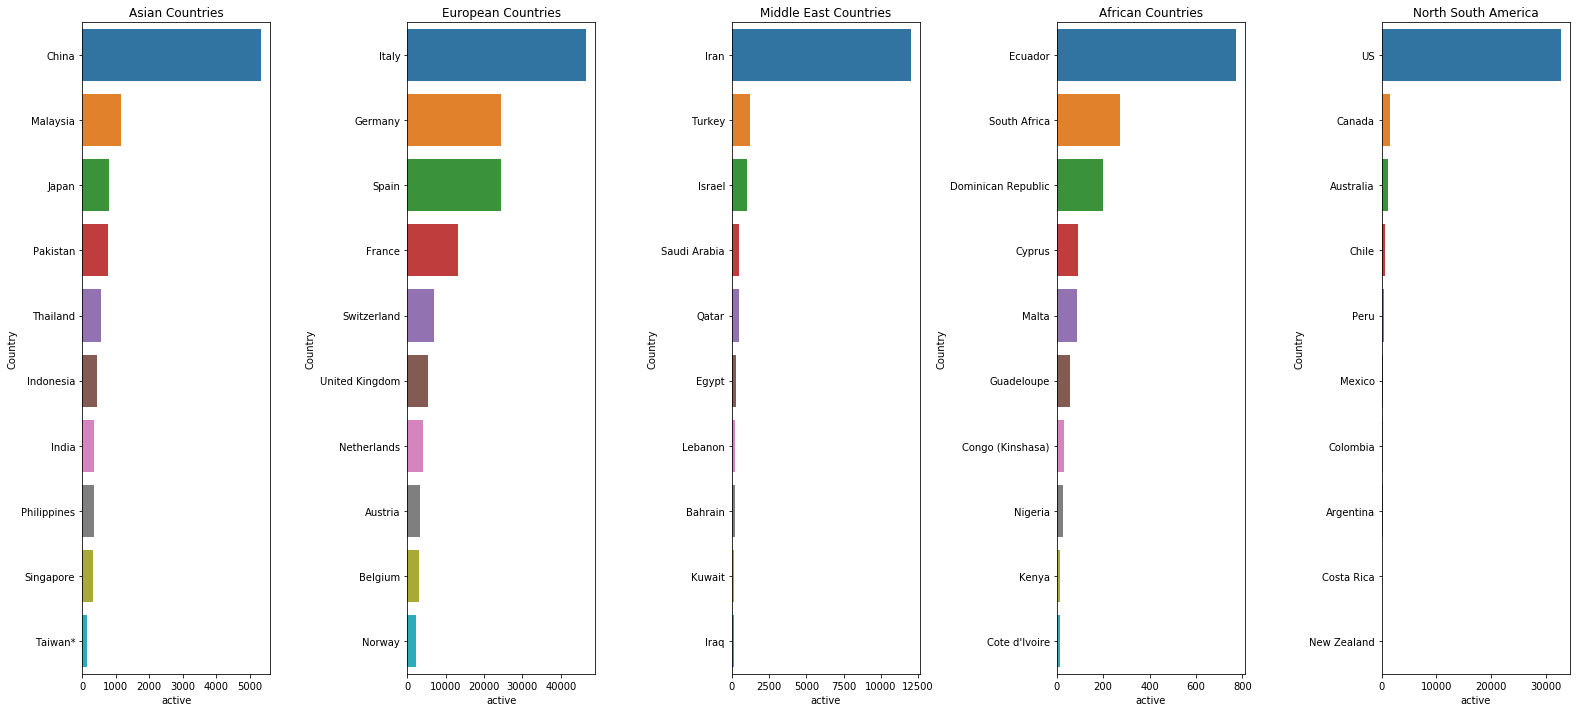

In [29]:
# plot the Confirmed cases
fig, ax = plt.subplots(1,5,figsize=(22,10))
sns.barplot(x='active',y='Country',data=asia.sort_values(by='active',ascending=False).iloc[:10],ax=ax[0])
ax[0].set_title('Asian Countries')
sns.barplot(x='active',y='Country',data=europe.sort_values(by='active',ascending=False).iloc[:10],ax=ax[1])
ax[1].set_title('European Countries')
sns.barplot(x='active',y='Country',data=middle_east.sort_values(by='active',ascending=False).iloc[:10],ax=ax[2])
ax[2].set_title('Middle East Countries')
sns.barplot(x='active',y='Country',data=africa.sort_values(by='active',ascending=False).iloc[:10],ax=ax[3])
ax[3].set_title('African Countries')
sns.barplot(x='active',y='Country',data=us.sort_values(by='active',ascending=False).iloc[:10],ax=ax[4])
ax[4].set_title('North South America')
plt.tight_layout();

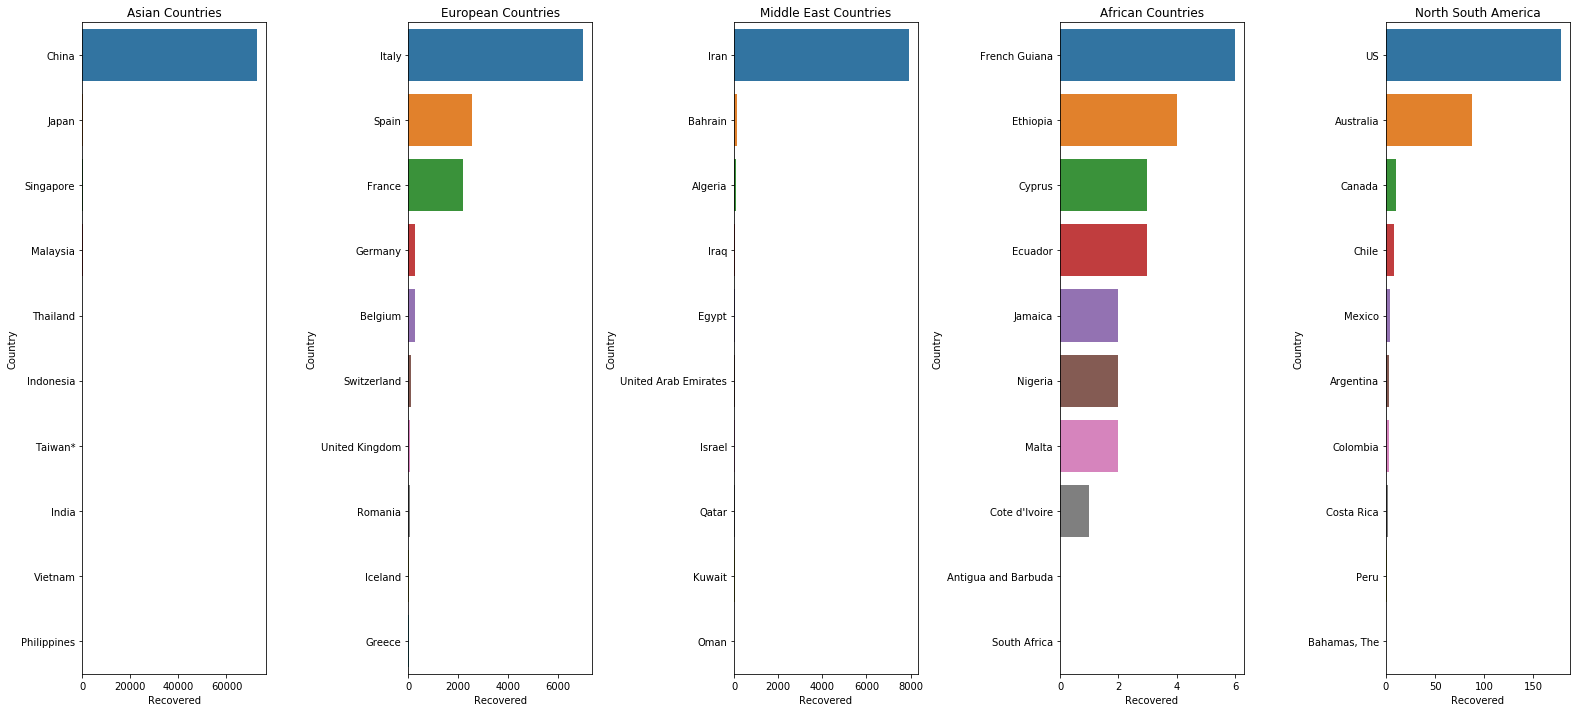

In [30]:
# plot the Recovered cases
fig, ax = plt.subplots(1,5,figsize=(22,10))
sns.barplot(x='Recovered',y='Country',data=asia.sort_values(by='Recovered',ascending=False).iloc[:10],ax=ax[0])
ax[0].set_title('Asian Countries')
sns.barplot(x='Recovered',y='Country',data=europe.sort_values(by='Recovered',ascending=False).iloc[:10],ax=ax[1])
ax[1].set_title('European Countries')
sns.barplot(x='Recovered',y='Country',data=middle_east.sort_values(by='Recovered',ascending=False).iloc[:10],ax=ax[2])
ax[2].set_title('Middle East Countries')
sns.barplot(x='Recovered',y='Country',data=africa.sort_values(by='Recovered',ascending=False).iloc[:10],ax=ax[3])
ax[3].set_title('African Countries')
sns.barplot(x='Recovered',y='Country',data=us.sort_values(by='Recovered',ascending=False).iloc[:10],ax=ax[4])
ax[4].set_title('North South America')
plt.tight_layout();

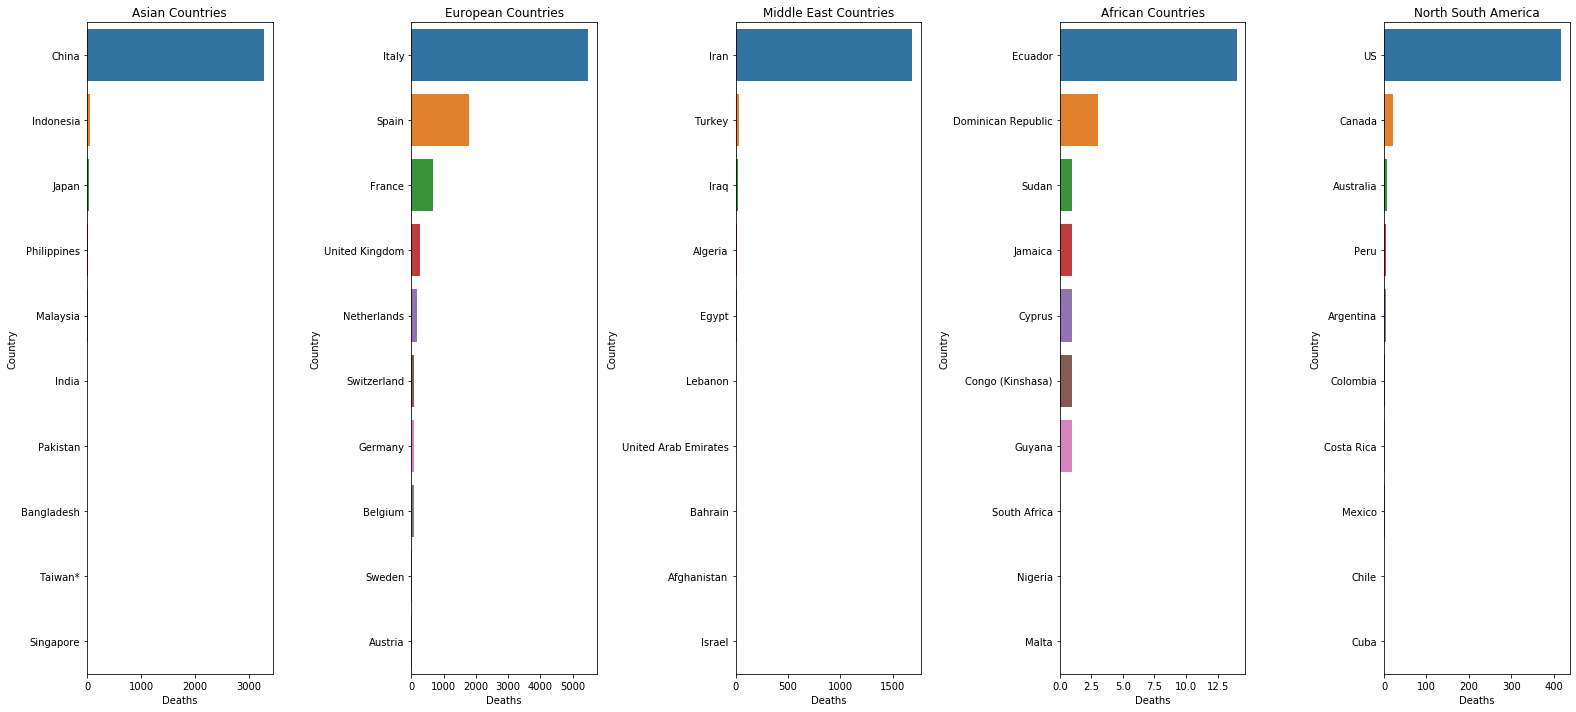

In [31]:
# plot the Deaths cases
fig, ax = plt.subplots(1,5,figsize=(22,10))
sns.barplot(x='Deaths',y='Country',data=asia.sort_values(by='Deaths',ascending=False).iloc[:10],ax=ax[0])
ax[0].set_title('Asian Countries')
sns.barplot(x='Deaths',y='Country',data=europe.sort_values(by='Deaths',ascending=False).iloc[:10],ax=ax[1])
ax[1].set_title('European Countries')
sns.barplot(x='Deaths',y='Country',data=middle_east.sort_values(by='Deaths',ascending=False).iloc[:10],ax=ax[2])
ax[2].set_title('Middle East Countries')
sns.barplot(x='Deaths',y='Country',data=africa.sort_values(by='Deaths',ascending=False).iloc[:10],ax=ax[3])
ax[3].set_title('African Countries')
sns.barplot(x='Deaths',y='Country',data=us.sort_values(by='Deaths',ascending=False).iloc[:10],ax=ax[4])
ax[4].set_title('North South America')
plt.tight_layout();